# Code Snippet 1: Downloading and Plotting Raw Seismic Data

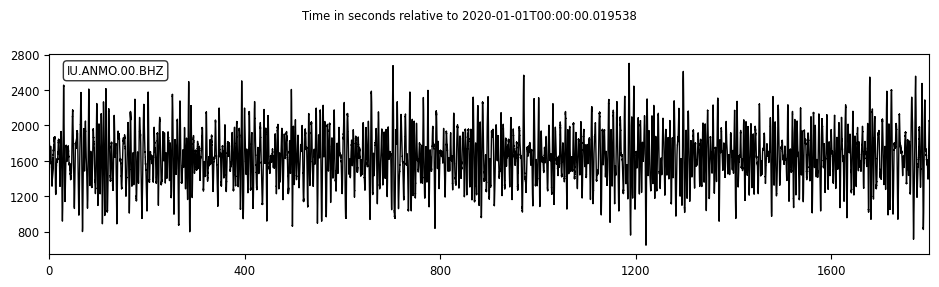

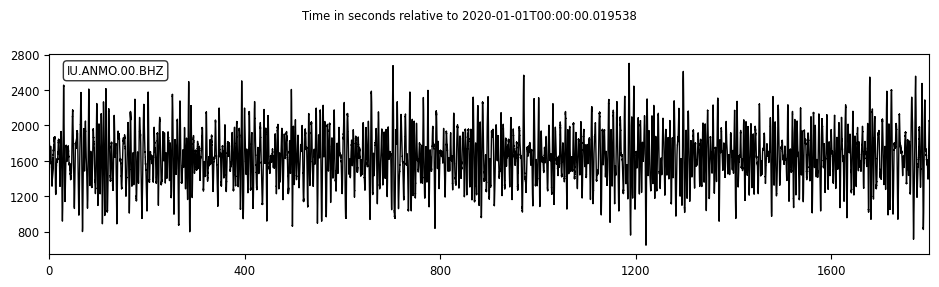

In [4]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt

# Initialize IRIS FDSN client
client = Client("IRIS")

# Define time range and station parameters
starttime = UTCDateTime("2020-01-01T00:00:00")
endtime = UTCDateTime("2020-01-01T00:30:00")
network = "IU"
station = "ANMO"
location = "00"
channel = "BHZ"

# Request waveform data
st = client.get_waveforms(network, station, location, channel, starttime, endtime)

# Plot the time-domain waveform
st.plot(type="relative", title="Raw Seismic Signal from IU.ANMO.BHZ", size=(1000, 300))


# Computing FFT of Raw Signal

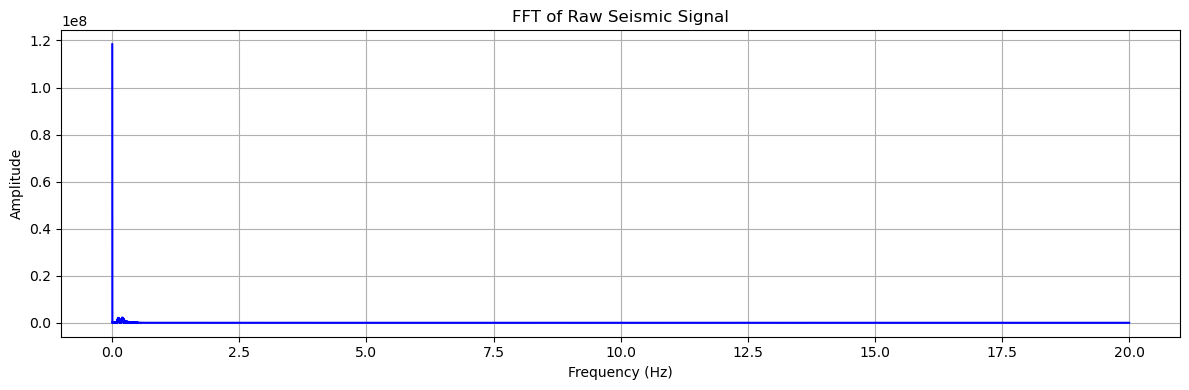

In [ ]:
# Extract the Trace object (tr) from the Stream (st)
tr = st[0]

# Compute the FFT of the raw signal
signal = tr.data
sampling_rate = tr.stats.sampling_rate
n = len(signal)

# Compute FFT and frequency bins
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
magnitude = np.abs(fft_result)

# Plot the single-sided amplitude spectrum
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:n // 2], magnitude[:n // 2], color='blue')
plt.title("FFT of Raw Seismic Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


# cleaning data 

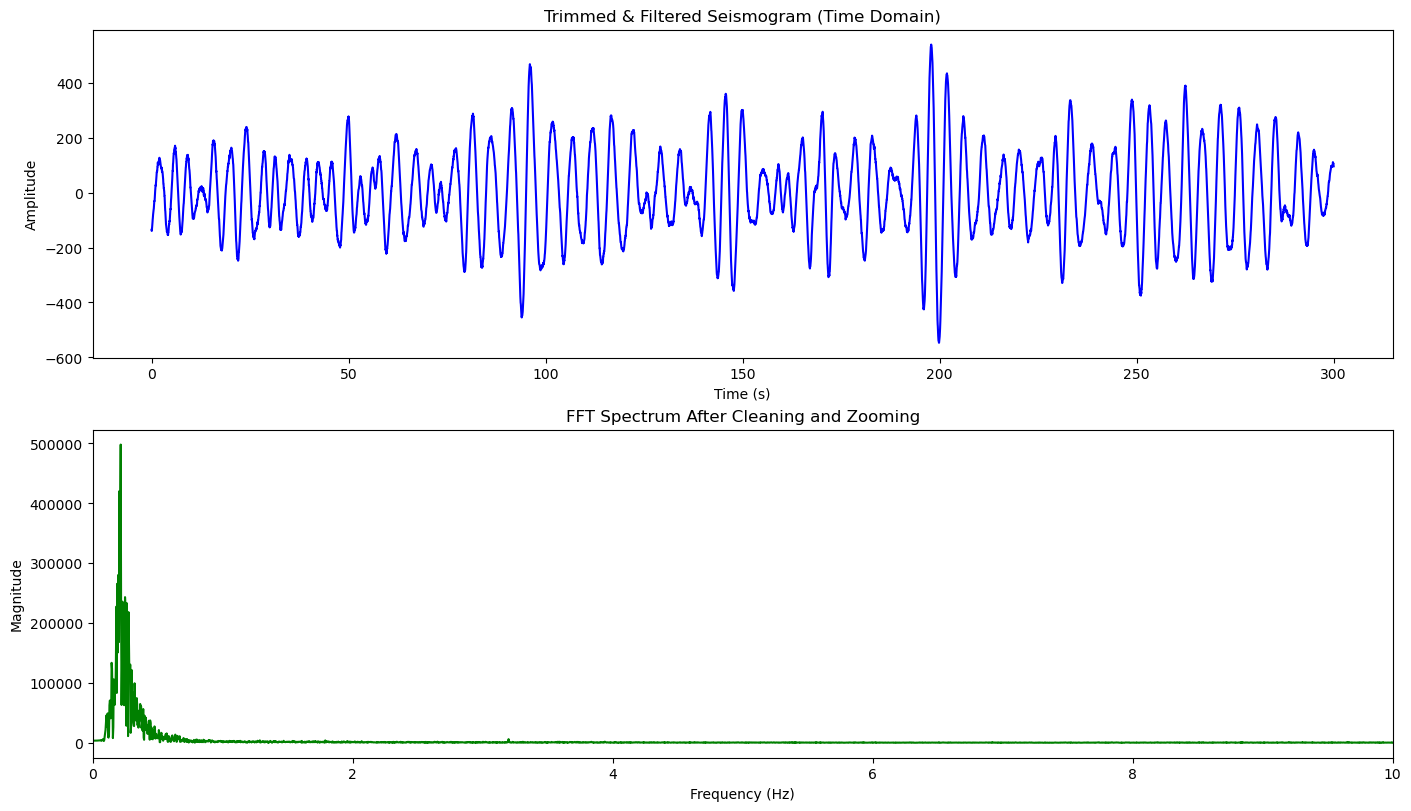

In [10]:
from obspy.signal.filter import bandpass

tr = st[0]

# Preprocessing to reveal more detail
tr.detrend("linear")                  # Remove trends
tr.taper(max_percentage=0.05)        # Smooth edges
tr.filter("bandpass", freqmin=0.2, freqmax=10.0)  # Focus on relevant frequency range

# Zoom into active region (e.g. 5 to 10 minutes into trace)
tr.trim(starttime + 300, starttime + 600)

# Extract signal and time base
signal = tr.data
sampling_rate = tr.stats.sampling_rate
n = len(signal)
time = np.linspace(0, n / sampling_rate, n)

# Perform FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
magnitude = np.abs(fft_result)

# Plot time and frequency domain
fig, axs = plt.subplots(2, 1, figsize=(14, 8), constrained_layout=True)

# Time-domain plot
axs[0].plot(time, signal, color='blue')
axs[0].set_title("Trimmed & Filtered Seismogram (Time Domain)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

# Frequency-domain plot (zoomed in)
axs[1].plot(frequencies[:n//2], magnitude[:n//2], color='green')
axs[1].set_xlim(0, 10)  # Zoom into most relevant frequencies
axs[1].set_title("FFT Spectrum After Cleaning and Zooming")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")

plt.show()

# scalogram 


In [11]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


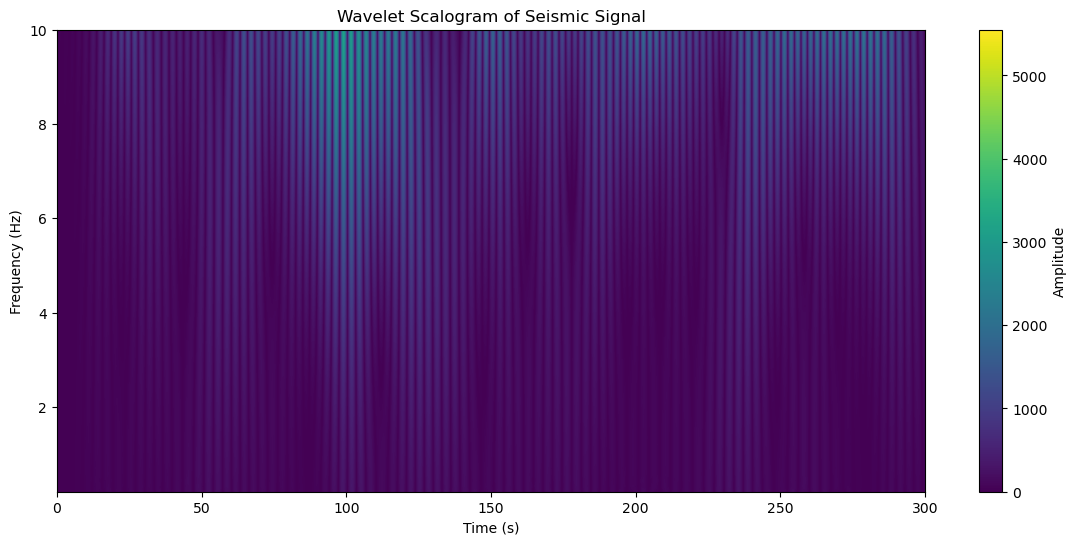

In [ ]:
import pywt

tr = st[0]

# Preprocessing
tr.detrend("linear")
tr.taper(max_percentage=0.05)
tr.filter("bandpass", freqmin=0.2, freqmax=10.0)
tr.trim(starttime + 300, starttime + 600)

signal = tr.data
sampling_rate = tr.stats.sampling_rate
time = np.linspace(0, len(signal) / sampling_rate, num=len(signal))

# Step 2: Apply Continuous Wavelet Transform
scales = np.arange(1, 256)
coefficients, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sampling_rate)

# Step 3: Plot the Scalogram
plt.figure(figsize=(14, 6))
plt.imshow(np.abs(coefficients), extent=[time[0], time[-1], freqs[-1], freqs[0]],
           cmap='viridis', aspect='auto', interpolation='bilinear')
plt.colorbar(label='Amplitude')
plt.title("Wavelet Scalogram of Seismic Signal")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.ylim(0.2, 10)  # Focus on relevant frequency range
plt.show()